Gather air quality data from Air Quality Open Data Platform https://aqicn.org/data-platform/token/#/ 

#### Realtime pollution analysis - March 14 2023 

In [1]:
import requests

In [2]:
city = 'India/Kochi/Vyttila/'
url = 'http://api.waqi.info/feed/' + city + '/?token='
api_key = '4177b154036317218f1622e4aa11c172a3f9ca38'

main_url = url + api_key

response = requests.get(main_url)
data = response.json()['data']
data

{'aqi': 133,
 'idx': 12820,
 'attributions': [{'url': 'http://cpcb.nic.in/',
   'name': 'CPCB - India Central Pollution Control Board',
   'logo': 'India-CPCB.png'},
  {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}],
 'city': {'geo': [9.969447, 76.321186],
  'name': 'Vyttila, Kochi, India',
  'url': 'https://aqicn.org/city/india/kochi/vyttila',
  'location': ''},
 'dominentpol': 'pm25',
 'iaqi': {'co': {'v': 12.6},
  'dew': {'v': 21.5},
  'h': {'v': 46},
  'no2': {'v': 23},
  'o3': {'v': 0.4},
  'p': {'v': 1007.5},
  'pm10': {'v': 76},
  'pm25': {'v': 133},
  'so2': {'v': 29.1},
  't': {'v': 34.5},
  'w': {'v': 1}},
 'time': {'s': '2023-03-14 13:00:00',
  'tz': '+05:30',
  'v': 1678798800,
  'iso': '2023-03-14T13:00:00+05:30'},
 'forecast': {'daily': {'o3': [{'avg': 14,
     'day': '2023-03-12',
     'max': 36,
     'min': 1},
    {'avg': 14, 'day': '2023-03-13', 'max': 38, 'min': 2},
    {'avg': 10, 'day': '2023-03-14', 'max': 32, 'min': 2},
    {'avg': 14, '

In [3]:
# Extract air quality information
aqi = data['aqi']
iaqi = data['iaqi']

del iaqi['p']


In [4]:
for i in iaqi.items():
    print(i[0],':',i[1]['v'])
    
dew = iaqi.get('dew','Nil')
no2 = iaqi.get('no2','Nil')
o3 = iaqi.get('o3','Nil')
so2 = iaqi.get('so2','Nil')
pm10 = iaqi.get('pm10','Nil')
pm25 = iaqi.get('pm25','Nil')

print(f"\n{city} AQI: {aqi}\n")
print('Individual Air quality')
print('Dew :', dew)
print('no2 :', no2)
print('Ozone :', o3)
print('sulphur :', so2)
print('pm10 :', pm10)
print('pm25 :', pm25)

co : 12.6
dew : 21.5
h : 46
no2 : 23
o3 : 0.4
pm10 : 76
pm25 : 133
so2 : 29.1
t : 34.5
w : 1

India/Kochi/Vyttila/ AQI: 133

Individual Air quality
Dew : {'v': 21.5}
no2 : {'v': 23}
Ozone : {'v': 0.4}
sulphur : {'v': 29.1}
pm10 : {'v': 76}
pm25 : {'v': 133}


['co', 'dew', 'h', 'no2', 'o3', 'pm10', 'pm25', 'so2', 't', 'w']
[12.6, 21.5, 46, 23, 0.4, 76, 133, 29.1, 34.5, 1]


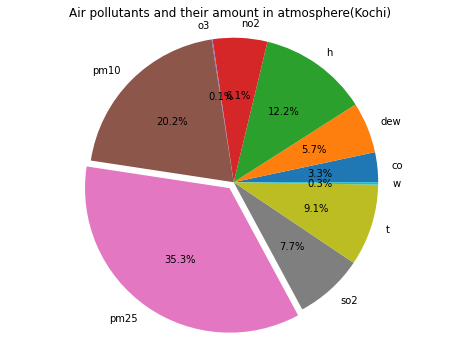

In [5]:
# visualize data

import matplotlib.pyplot as plt

pollutants = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]

print(pollutants)
print(values)

explode = [0 for i in pollutants]
mx = values.index(max(values))
explode[mx] = 0.05

plt.figure(figsize=(8,6))
plt.pie(values,labels=pollutants,explode=explode, autopct='%1.1f%%')
plt.title('Air pollutants and their amount in atmosphere(Kochi)')
plt.axis('equal')
plt.show()

### plot location using cartopy

In [6]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (7.2.1-1~focal0).
proj-bin is already the newest version (7.2.1-1~focal0).
proj-data is already the newest version (7.2.1-1~focal0).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.9.1-1~focal0).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip uninstall shapely
!pip install shapely --no-binary shapely

Found existing installation: Shapely 1.8.5.post1
Uninstalling Shapely-1.8.5.post1:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/Shapely-1.8.5.post1.dist-info/*
    /usr/local/lib/python3.9/dist-packages/shapely/*
Proceed (Y/n)? Y
  Successfully uninstalled Shapely-1.8.5.post1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached shapely-2.0.1.tar.gz (275 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/10/a7/de139da3ce303101c357a9ba801328cba85cf6ace157da31a4007bca85e4/shapely-2.0.1.tar.gz#sha256=66a6b1a3e72ece97fc85536a281476f9b7794de2e646ca8a4517e2e3c1446893 (from https://pypi.org/simple/shapely/) (requires-python:>=3.7): Requested unknown from https://files.pythonhosted.org/packages/10/a7/de139da3ce303101c357a9ba801328cba85cf6ace1

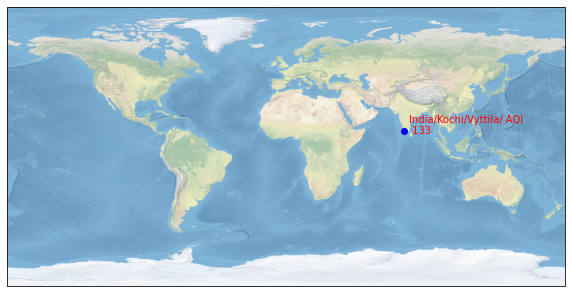

In [8]:
import cartopy.crs as ccrs

# extract latitude and longitude from data
geo = data['city']['geo']

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection =ccrs.PlateCarree())
ax.stock_img()

plt.scatter(geo[1],geo[0], color='blue')
plt.text(geo[1] + 3,geo[0]-2 , f'{city} AQI \n {aqi}', color='red')
plt.show()

Historical data Analysis

downloaded from : https://aqicn.org/data-platform/register/

In [9]:
# read the csv file into dataframe
import pandas as pd

path = '/content/vyttila,-kochi, india-air-quality.csv'
df = pd.read_csv(path)
df

,date,pm25,pm10,o3,no2,so2,co
0,2023/3/1,146,67,,1,9,10
1,2023/3/2,152,77,,6,12,10
2,2023/3/3,151,130,,6,12,11
3,2023/3/4,210,98,,2,14,11
4,2023/3/5,170,90,,6,13,10
...,...,...,...,...,...,...,...
1027,2020/12/15,,66,11,2,1,10
1028,2020/12/16,,58,4,2,2,10
1029,2020/9/28,,44,4,2,2,15
1030,2020/4/13,,40,,,8,9


In [10]:
df.columns

# rename columns

df = df.rename(columns = {' pm25':'pm25',
                          ' pm10': 'pm10',
                          ' o3': 'o3',
                          ' no2': 'no2',
                          ' so2': 'so2',
                         ' co': 'co' })

df.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

In [11]:
# gather last 1 year data
df['date'] = pd.to_datetime(df.date)

df_yr = df.loc[df['date']>'2022-03-12']
df_yr = df_yr.sort_values(by='date')
df_yr

,date,pm25,pm10,o3,no2,so2,co
379,2022-03-13,117,49,10,7,1,6
380,2022-03-14,103,53,5,7,1,6
381,2022-03-15,113,41,5,6,1,6
382,2022-03-16,86,58,4,8,2,7
383,2022-03-17,124,89,1,9,1,8
...,...,...,...,...,...,...,...
9,2023-03-10,164,87,,14,19,11
10,2023-03-11,174,83,,18,19,11
11,2023-03-12,168,75,,14,19,11
12,2023-03-13,148,65,,1,23,11


In [12]:
df_yr.drop(13, inplace=True)
df_yr

,date,pm25,pm10,o3,no2,so2,co
379,2022-03-13,117,49,10,7,1,6
380,2022-03-14,103,53,5,7,1,6
381,2022-03-15,113,41,5,6,1,6
382,2022-03-16,86,58,4,8,2,7
383,2022-03-17,124,89,1,9,1,8
...,...,...,...,...,...,...,...
8,2023-03-09,177,83,,14,20,11
9,2023-03-10,164,87,,14,19,11
10,2023-03-11,174,83,,18,19,11
11,2023-03-12,168,75,,14,19,11


In [13]:
# fill empty cells with 0
df_yr.replace(' ','0', inplace=True)
df_yr

,date,pm25,pm10,o3,no2,so2,co
379,2022-03-13,117,49,10,7,1,6
380,2022-03-14,103,53,5,7,1,6
381,2022-03-15,113,41,5,6,1,6
382,2022-03-16,86,58,4,8,2,7
383,2022-03-17,124,89,1,9,1,8
...,...,...,...,...,...,...,...
8,2023-03-09,177,83,0,14,20,11
9,2023-03-10,164,87,0,14,19,11
10,2023-03-11,174,83,0,18,19,11
11,2023-03-12,168,75,0,14,19,11


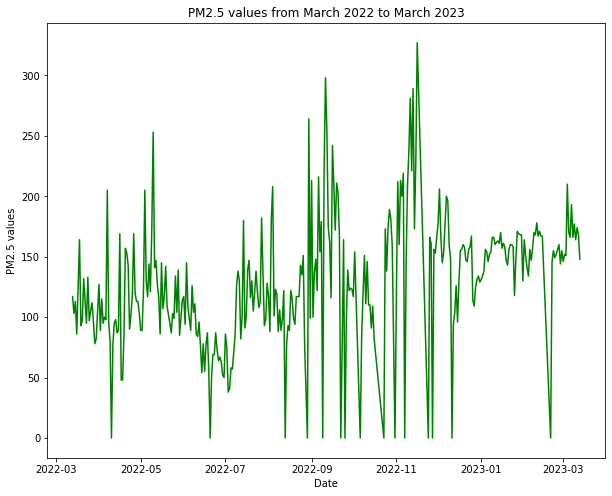

In [14]:
# plot pm25

dates = df_yr['date']
pm25 = df_yr['pm25']

pm25 = [int(i) for i in pm25]

plt.figure(figsize=(10,8))
plt.plot(dates, pm25, color = 'green')
plt.title('PM2.5 values from March 2022 to March 2023')
plt.xlabel('Date')
plt.ylabel('PM2.5 values')
plt.show()

In [15]:
# compare year before with current year

mask = (df['date']> '2021-03-29') & (df['date']<'2022-03-8')

df_last = df.loc[mask]
df_last

,date,pm25,pm10,o3,no2,so2,co
310,2022-01-03,116,56,14,7,9,12
311,2022-01-04,138,77,14,7,10,13
312,2022-01-05,166,85,17,7,9,12
313,2022-01-06,176,77,14,7,7,10
314,2022-01-07,152,66,13,7,7,8
...,...,...,...,...,...,...,...
672,2021-06-28,75,39,4,1,2,9
673,2021-06-29,54,47,4,1,2,9
674,2021-06-30,105,44,1,1,2,7
760,2021-03-30,108,46,,2,6,9


343
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

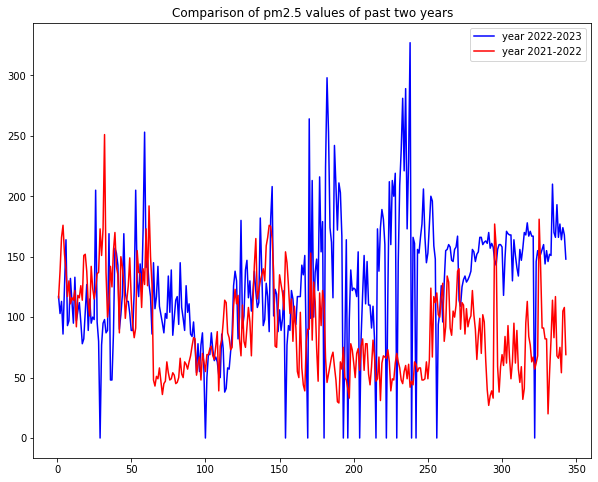

In [16]:
dates = df_yr['date']
pm_25_1 = df_yr['pm25']
pm_25_1  = [int(i) for i in pm25]

print(len(pm_25_1))

pm_25_2 = df_last['pm25']
pm_25_2 = [int(i) for i in pm_25_2]

plt.figure(figsize=(10,8))
length = [i for i in range(1,len(dates)+1)]
print(length)
plt.plot(length, pm_25_1, color='blue', label = 'year 2022-2023' )
plt.plot(length, pm_25_2, color='red', label = 'year 2021-2022' )
plt.title('Comparison of pm2.5 values of past two years')
plt.legend()
plt.show()


Answer some questions

1) On which date pm2.5 value was minimum at Kochi in past 1 year?

In [17]:
df_yr['pm25'] = [int(i) for i in df_yr['pm25']]
filtered_df = df_yr[df_yr['pm25']!=0]
print(filtered_df[filtered_df['pm25']==filtered_df['pm25'].min()])

          date  pm25 pm10 o3 no2 so2  co
137 2022-07-03    38   22  0   4   9   4


2) On which date O3 value was maximum at Kochi in past 1 year?

In [18]:
df_yr['o3'] = [int(i) for i in df_yr['o3']]
print(df_yr[df_yr.o3==df_yr.o3.max()])

          date  pm25 pm10  o3 no2 so2  co
379 2022-03-13   117   49  10   7   1   6


3) What was the average value of so2 for the past 1 yr?

In [19]:
df_yr['so2'] = [int(i) for i in df_yr['so2']]
avgso2 = df_yr['so2'].mean()
print('The average value of so2:', avgso2)

The average value of so2: 3.2653061224489797
